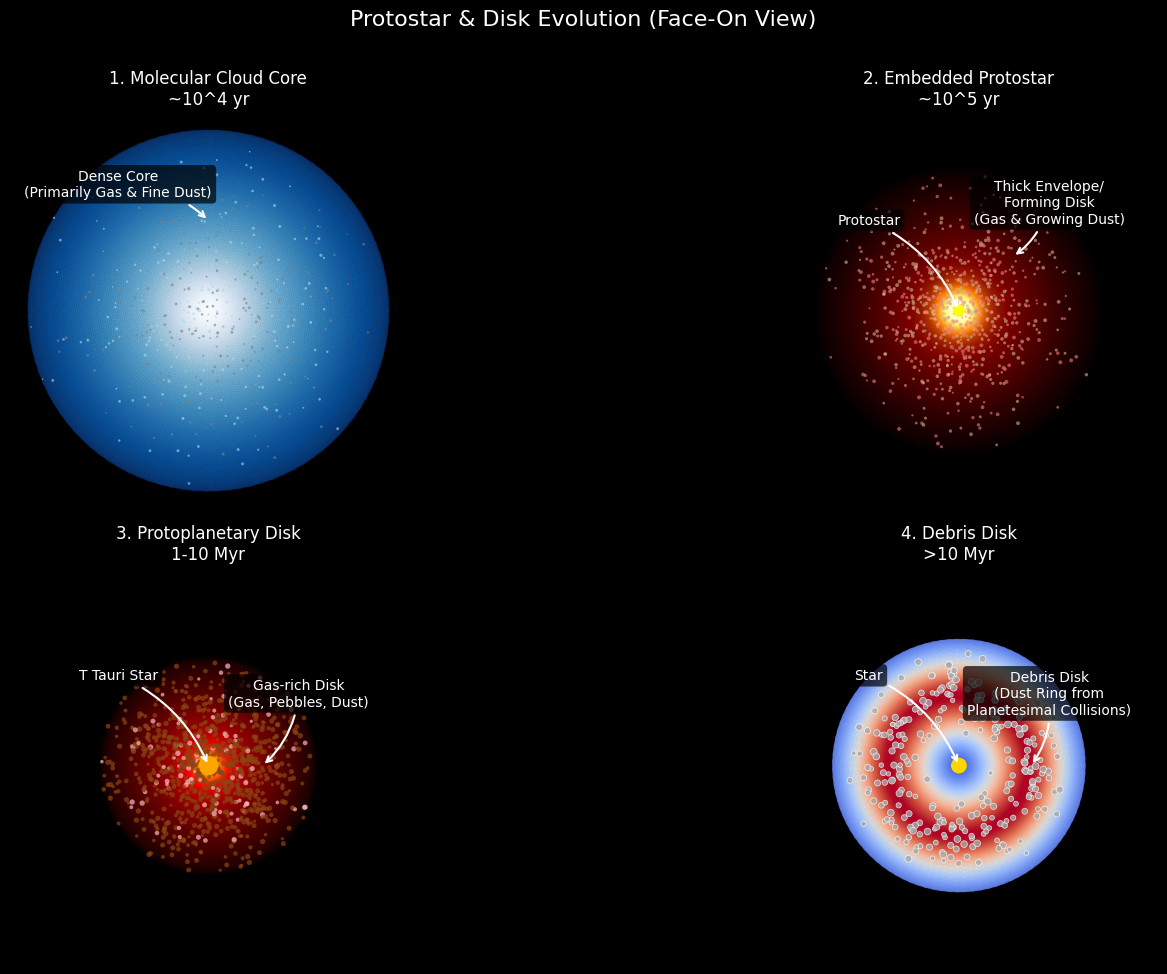

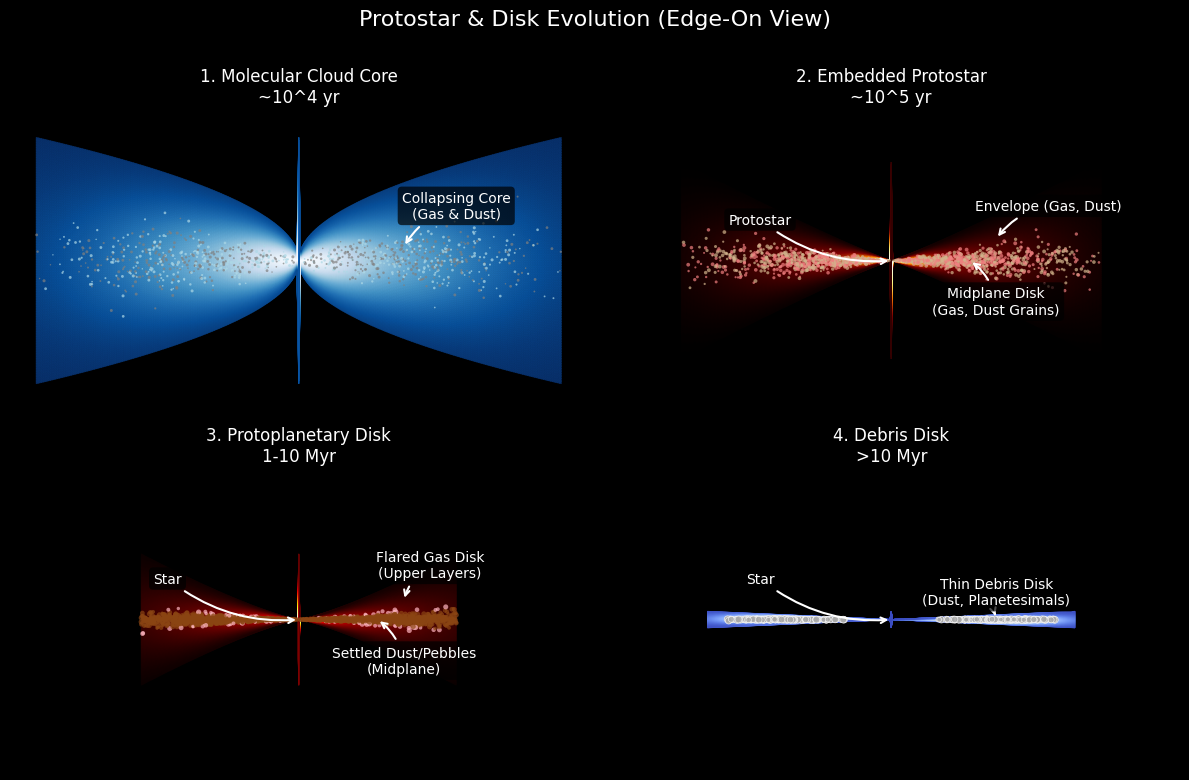

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
import random

def calculate_scale_height(x, H_ref, R_ref, beta, epsilon):
    """Calculates scale height H(x) = H_ref * (x/R_ref)**beta, handling x=0 or R_ref=0."""
    # Ensure x is non-negative for calculation if mirrored values are passed
    x_abs = np.abs(x)
    # Condition for applying the power law: R_ref is valid and x is far enough from 0
    condition = (R_ref > epsilon) & (x_abs > epsilon)
    # Calculate power law where condition is True, avoid division by zero or negative base
    # Use np.power for safe exponentiation
    power_law_h = H_ref * np.power((x_abs + epsilon) / (R_ref + epsilon), beta) # Add epsilon for safety
    # Use np.where to choose between power law and H_ref based on condition
    # If condition is False, return H_ref (or a small value if H_ref could be 0)
    return np.where(condition, power_law_h, H_ref)


# --- Simulation Parameters for Stages (with added annotation info and content details) ---
stages = [
    {
        'name': '1. Molecular Cloud Core\n~10^4 yr',
        'r_outer': 10.0,
        'density_profile': lambda r: np.exp(-(r/5)**2),
        'temp_profile': lambda r: 10 + 10 * np.exp(-(r/2)**2),
        'star_visible': False,
        'cmap': 'Blues_r',
        'scale_height': 1.5, # H_ref at r_outer
        'flaring_index': 0.5, # beta
        'content': {'type': 'gas_dust', 'n_particles': 500, 'gas_color': '#ADD8E6', 'dust_color': 'grey', 'size_range': (1, 5)}, # Lighter blue
        'face_annotations': [
            {'text': 'Dense Core\n(Primarily Gas & Fine Dust)', 'xy': (0, 5), 'xytext': (-5, 7), 'color': 'white', 'arrow': True},
        ],
        'edge_annotations': [
             {'text': 'Collapsing Core\n(Gas & Dust)', 'xy': (4, 0.5), 'xytext': (6, 2.0), 'color': 'white', 'arrow': True},
        ]
    },
    {
        'name': '2. Embedded Protostar\n~10^5 yr',
        'r_outer': 8.0,
        'density_profile': lambda r: 0.5 * np.exp(-(r/4)**2) + 0.5*np.exp(-(r/1.5)**2),
        'temp_profile': lambda r: 50 + 200 * np.exp(-(r/1)**2),
        'star_visible': True,
        'star_radius': 0.3,
        'star_color': 'yellow',
        'cmap': 'afmhot',
        'scale_height': 1.2,
        'flaring_index': 1.1,
        'content': {'type': 'gas_dust_envelope', 'n_particles': 800, 'gas_color': '#F08080', 'dust_color': 'tan', 'size_range': (2, 8), 'settling': 0.2}, # Light coral
        'face_annotations': [
            {'text': 'Protostar', 'xy': (0, 0), 'xytext': (-5, 5), 'color': 'white', 'arrow': True},
            {'text': 'Thick Envelope/\nForming Disk\n(Gas & Growing Dust)', 'xy': (3, 3), 'xytext': (5, 6), 'color': 'white', 'arrow': True},
        ],
        'edge_annotations': [
            {'text': 'Protostar', 'xy': (0, 0), 'xytext': (-5, 1.5), 'color': 'white', 'arrow': True},
            {'text': 'Envelope (Gas, Dust)', 'xy': (4, 0.8), 'xytext': (6, 2.0), 'color': 'white', 'arrow': True},
            {'text': 'Midplane Disk\n(Gas, Dust Grains)', 'xy': (3, 0), 'xytext': (4, -1.5), 'color': 'white', 'arrow': True},
        ]
    },
    {
        'name': '3. Protoplanetary Disk\n1-10 Myr',
        'r_outer': 6.0,
        'density_profile': lambda r: np.exp(-(r/3)**1.5),
        'temp_profile': lambda r: 100 + 1000 * np.exp(-(r/0.5)**1),
        'star_visible': True,
        'star_radius': 0.5,
        'star_color': 'orange',
        'cmap': 'hot',
        'scale_height': 0.8,
        'flaring_index': 1.25,
        'content': {'type': 'gas_pebbles', 'n_particles': 1000, 'gas_color': '#FFB6C1', 'dust_color': 'saddlebrown', 'size_range': (5, 15), 'settling': 0.8}, # Light Pink
        'face_annotations': [
            {'text': 'T Tauri Star', 'xy': (0, 0), 'xytext': (-5, 5), 'color': 'white', 'arrow': True},
            {'text': 'Gas-rich Disk\n(Gas, Pebbles, Dust)', 'xy': (3, 0), 'xytext': (5, 4), 'color': 'white', 'arrow': True},
        ],
        'edge_annotations': [
            {'text': 'Star', 'xy': (0, 0), 'xytext': (-5, 1.5), 'color': 'white', 'arrow': True},
            {'text': 'Flared Gas Disk\n(Upper Layers)', 'xy': (4, 0.7), 'xytext': (5, 2.0), 'color': 'white', 'arrow': True},
            {'text': 'Settled Dust/Pebbles\n(Midplane)', 'xy': (3, 0), 'xytext': (4, -1.5), 'color': 'white', 'arrow': True},
        ]
    },
    {
        'name': '4. Debris Disk\n>10 Myr',
        'r_outer': 7.0,
        'density_profile': lambda r: 0.1 * (np.exp(-((r-4.0)/1.5)**2)),
        'temp_profile': lambda r: 20 + 50 * np.exp(-(r/2)**2),
        'star_visible': True,
        'star_radius': 0.4,
        'star_color': 'gold',
        'cmap': 'coolwarm',
        'scale_height': 0.1, # Very thin
        'flaring_index': 1.0, # Minimal flaring
        'content': {'type': 'debris', 'n_particles': 300, 'dust_color': 'darkgrey', 'size_range': (10, 25), 'settling': 0.95}, # Highly settled
        'face_annotations': [
            {'text': 'Star', 'xy': (0, 0), 'xytext': (-5, 5), 'color': 'white', 'arrow': True},
            {'text': 'Debris Disk\n(Dust Ring from\nPlanetesimal Collisions)', 'xy': (4, 0), 'xytext': (5, 4), 'color': 'white', 'arrow': True},
        ],
        'edge_annotations': [
            {'text': 'Star', 'xy': (0, 0), 'xytext': (-5, 1.5), 'color': 'white', 'arrow': True},
            {'text': 'Thin Debris Disk\n(Dust, Planetesimals)', 'xy': (4, 0.05), 'xytext': (4, 1.0), 'color': 'white', 'arrow': True},
        ]
    }
]

# --- Create Plots ---
fig_face, axs_face = plt.subplots(2, 2, figsize=(18, 10), subplot_kw={'aspect': 'equal'})
fig_edge, axs_edge = plt.subplots(2, 2, figsize=(12, 8))

max_r_plot = 11
edge_x_limit = max_r_plot
edge_z_limit = max_r_plot * 0.5

plt.rcParams.update({
    'text.color': "white", 'axes.labelcolor': "white",
    'xtick.color':"white", 'ytick.color':"white",
    'axes.edgecolor':"white", 'axes.titlecolor':"white",
    'figure.facecolor': 'black'
})

epsilon = 1e-6 # Define epsilon globally

for i, stage in enumerate(stages):
    row, col = i // 2, i % 2
    ax_face = axs_face[row, col]
    ax_edge = axs_edge[row, col]

    # Extract stage parameters
    H_ref = stage['scale_height']
    R_ref = stage['r_outer'] if stage['r_outer'] > 0 else 1.0
    beta = stage['flaring_index']

    # --- Face-on Plot ---
    ax_face.set_title(stage['name'], color='white')
    ax_face.set_facecolor('black')

    n_r, n_theta = 100, 100
    r_grid = np.linspace(epsilon, stage['r_outer'], n_r) # Start from epsilon
    theta_grid = np.linspace(0, 2 * np.pi, n_theta)
    R, Theta = np.meshgrid(r_grid, theta_grid)

    Z_bg = stage['temp_profile'](R) * stage['density_profile'](R) # No need for epsilon if r_grid starts > 0
    cmap = plt.get_cmap(stage['cmap'])
    z_min_plot = np.min(Z_bg[Z_bg>0]) if np.any(Z_bg>0) else 1e-9
    norm = mcolors.PowerNorm(gamma=0.5, vmin=max(Z_bg.min(), epsilon), vmax=Z_bg.max()) # Use epsilon for vmin

    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    try:
        c = ax_face.pcolormesh(X, Y, Z_bg, cmap=cmap, norm=norm, shading='gouraud', zorder=1, alpha=0.7)
    except ValueError as e:
        print(f"Warning: Colormap normalization failed for face-on stage {i+1}. Using linear scaling. Error: {e}")
        norm_fallback = mcolors.Normalize(vmin=Z_bg.min(), vmax=Z_bg.max())
        c = ax_face.pcolormesh(X, Y, Z_bg, cmap=cmap, norm=norm_fallback, shading='gouraud', zorder=1, alpha=0.7)

    # Add illustrative particles (face-on)
    content = stage['content']
    n_part = content['n_particles']

    r_samples = np.linspace(epsilon, stage['r_outer'], 500)
    density_samples = stage['density_profile'](r_samples)
    # Ensure density is non-negative before calculating PDF
    density_samples = np.maximum(density_samples, 0)
    pdf = r_samples * density_samples
    pdf_sum = np.sum(pdf)

    if pdf_sum > epsilon: # Check if sum is significantly positive
        pdf = pdf / pdf_sum
        try:
            particle_r = np.random.choice(r_samples, size=n_part, p=pdf)
            particle_r += np.random.uniform(-0.5 * (stage['r_outer']/500), 0.5 * (stage['r_outer']/500), n_part)
            particle_r = np.clip(particle_r, 0, stage['r_outer'])
        except ValueError as e:
             print(f"Warning: np.random.choice failed for face-on stage {i+1} (PDF sum issue? Sum={pdf_sum}). Using uniform distribution. Error: {e}")
             particle_r = np.random.uniform(0, stage['r_outer'], n_part)

    else:
        print(f"Warning: Could not generate valid PDF for face-on stage {i+1} (Density sum={np.sum(density_samples)}). Using uniform distribution.")
        particle_r = np.random.uniform(0, stage['r_outer'], n_part)


    particle_theta = np.random.uniform(0, 2 * np.pi, n_part)
    particle_x = particle_r * np.cos(particle_theta)
    particle_y = particle_r * np.sin(particle_theta)
    particle_sizes = np.random.uniform(content['size_range'][0], content['size_range'][1], n_part)

    # Particle colors and plotting (face-on)
    if content['type'] == 'gas_dust' or content['type'] == 'gas_dust_envelope':
        colors = [random.choice([content['gas_color'], content['dust_color']]) for _ in range(n_part)]
        ax_face.scatter(particle_x, particle_y, s=particle_sizes, c=colors, alpha=0.6, zorder=5, edgecolors='none')
    elif content['type'] == 'gas_pebbles':
        colors = [content['dust_color'] if random.random() > 0.1 else content['gas_color'] for _ in range(n_part)]
        ax_face.scatter(particle_x, particle_y, s=particle_sizes, c=colors, alpha=0.7, zorder=5, edgecolors='none')
    elif content['type'] == 'debris':
        colors = [content['dust_color']] * n_part
        ring_center = 4.0
        ring_width = 1.5
        mask = (particle_r > ring_center - 1.5*ring_width) & (particle_r < ring_center + 1.5*ring_width)
        if np.any(mask):
             ax_face.scatter(particle_x[mask], particle_y[mask], s=particle_sizes[mask], c=np.array(colors)[mask], alpha=0.8, zorder=5, edgecolors='w', linewidth=0.5)
        else:
             print(f"Warning: No debris particles generated within the specified ring for face-on stage {i+1}.")


    if stage['star_visible']:
        star_face = Circle((0, 0), stage['star_radius'], color=stage['star_color'], zorder=10)
        ax_face.add_patch(star_face)

    ax_face.set_xlim(-max_r_plot, max_r_plot)
    ax_face.set_ylim(-max_r_plot, max_r_plot)

    # Add face-on annotations
    for ann in stage['face_annotations']:
        arrowprops = dict(arrowstyle='->', color=ann['color'], lw=1.5, connectionstyle="arc3,rad=-0.2") if ann.get('arrow', False) else None
        ax_face.annotate(ann['text'], xy=ann['xy'], xytext=ann['xytext'],
                         color=ann['color'], ha='center', va='center',
                         arrowprops=arrowprops, zorder=15, bbox=dict(boxstyle="round,pad=0.3", fc="black", ec="none", alpha=0.7))


    # --- Edge-on Plot ---
    ax_edge.set_title(stage['name'], color='white')
    ax_edge.set_facecolor('black')

    n_x_bg, n_z_bg = 150, 100 # Grid points for background pcolormesh
    x_disk_grid = np.linspace(epsilon, stage['r_outer'], n_x_bg) # Start grid from epsilon

    # Calculate H(x) on the grid using the helper function
    H_x_grid = calculate_scale_height(x_disk_grid, H_ref, R_ref, beta, epsilon)

    z_max_local_bg = 3.0
    z_rel_bg = np.linspace(-z_max_local_bg, z_max_local_bg, n_z_bg)
    X_edge_grid, Z_rel_edge_grid = np.meshgrid(x_disk_grid, z_rel_bg)
    # Calculate Z_edge_grid using H_x_grid (needs broadcasting)
    Z_edge_grid = Z_rel_edge_grid * H_x_grid[np.newaxis, :] # Broadcast H_x along z dimension

    Temp_edge_bg = stage['temp_profile'](X_edge_grid)
    Density_edge_bg = stage['density_profile'](X_edge_grid) * np.exp(-0.5 * Z_rel_edge_grid**2)
    W_bg = Temp_edge_bg * Density_edge_bg

    # Mirror background grid
    X_edge_full_grid = np.concatenate((-X_edge_grid[:, ::-1], X_edge_grid), axis=1)
    W_bg_full = np.concatenate((W_bg[:, ::-1], W_bg), axis=1)
    # Mirror Z_edge_grid correctly
    Z_edge_full_grid = np.concatenate((-Z_edge_grid[:, ::-1], Z_edge_grid), axis=1) # Z flips sign


    norm_edge = mcolors.PowerNorm(gamma=0.5, vmin=max(W_bg.min(), epsilon), vmax=W_bg.max())

    try:
      c_edge = ax_edge.pcolormesh(X_edge_full_grid, Z_edge_full_grid, W_bg_full, cmap=cmap, norm=norm_edge, shading='gouraud', zorder=1, alpha=0.7)
    except ValueError as e:
        print(f"Warning: Colormap normalization failed for edge-on stage {i+1}. Using linear scaling. Error: {e}")
        norm_fallback = mcolors.Normalize(vmin=W_bg.min(), vmax=W_bg.max())
        c_edge = ax_edge.pcolormesh(X_edge_full_grid, Z_edge_full_grid, W_bg_full, cmap=cmap, norm=norm_fallback, shading='gouraud', zorder=1, alpha=0.7)

    # Add illustrative particles (edge-on)
    particle_x_pos = particle_r # Reuse positive r from face-on
    particle_x_edge_full = np.concatenate([-particle_x_pos, particle_x_pos]) # Mirror x positions
    n_part_full = len(particle_x_edge_full)

    # Calculate local scale height H(|x|) for all particles using the helper function
    H_local = calculate_scale_height(particle_x_edge_full, H_ref, R_ref, beta, epsilon)

    settling = content.get('settling', 0.0)
    z_std_dev = H_local * (1.0 - 0.8 * settling**2) / 2.0
    # Ensure std dev is non-negative
    z_std_dev = np.maximum(z_std_dev, epsilon)
    particle_z_full = np.random.normal(0, z_std_dev, n_part_full)

    particle_sizes_edge = np.random.uniform(content['size_range'][0], content['size_range'][1], n_part_full)

    # Assign colors based on type for edge-on view
    if content['type'] == 'gas_dust' or content['type'] == 'gas_dust_envelope':
        colors_edge = [random.choice([content['gas_color'], content['dust_color']]) for _ in range(n_part_full)]
    elif content['type'] == 'gas_pebbles':
        # Gas mostly higher up (relative to local H), dust/pebbles settled
        colors_edge = [content['gas_color'] if np.abs(pz) > H_local[k]*0.5 else content['dust_color']
                       for k, pz in enumerate(particle_z_full)]
    elif content['type'] == 'debris':
        colors_edge = [content['dust_color']] * n_part_full # Start with default color
        # Apply ring mask
        ring_center = 4.0
        ring_width = 1.5
        mask_edge = (np.abs(particle_x_edge_full) > ring_center - 1.5*ring_width) & (np.abs(particle_x_edge_full) < ring_center + 1.5*ring_width)

        # Filter all particle properties using the mask
        particle_x_edge_full = particle_x_edge_full[mask_edge]
        particle_z_full = particle_z_full[mask_edge]
        particle_sizes_edge = particle_sizes_edge[mask_edge]
        # Update colors_edge AFTER filtering
        colors_edge = [content['dust_color']] * len(particle_x_edge_full)

    # Scatter plot for particles
    if len(particle_x_edge_full) > 0:
        common_scatter_args = {'alpha': 0.7, 'zorder': 5, 'edgecolors': 'none'}
        ax_edge.scatter(particle_x_edge_full, particle_z_full, s=particle_sizes_edge, c=colors_edge, **common_scatter_args)
        if content['type'] == 'debris': # Add edges for debris
             ax_edge.scatter(particle_x_edge_full, particle_z_full, s=particle_sizes_edge, c=colors_edge, alpha=0.8, zorder=5, edgecolors='w', linewidth=0.5)
    elif content['type'] == 'debris':
         print(f"Warning: No debris particles generated within the specified ring for edge-on stage {i+1}.")

    ax_edge.set_xlim(-edge_x_limit, edge_x_limit)
    ax_edge.set_ylim(-edge_z_limit, edge_z_limit)

    # Add edge-on annotations
    for ann in stage['edge_annotations']:
        arrowprops = dict(arrowstyle='->', color=ann['color'], lw=1.5, connectionstyle="arc3,rad=0.2") if ann.get('arrow', False) else None
        ax_edge.annotate(ann['text'], xy=ann['xy'], xytext=ann['xytext'],
                         color=ann['color'], ha='center', va='center',
                         arrowprops=arrowprops, zorder=15, bbox=dict(boxstyle="round,pad=0.3", fc="black", ec="none", alpha=0.7))

    # Remove axes for both plots
    ax_face.axis('off')
    ax_edge.axis('off')

# --- Final Adjustments and Show ---
fig_face.suptitle("Protostar & Disk Evolution (Face-On View)", fontsize=16, color='white')
fig_face.tight_layout(rect=[0, 0.01, 1, 0.97])

fig_edge.suptitle("Protostar & Disk Evolution (Edge-On View)", fontsize=16, color='white')
fig_edge.tight_layout(rect=[0, 0.01, 1, 0.97])

plt.show()
